In [40]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')



#getting data
Fb_df = pd.read_csv('/content/drive/MyDrive/MLResearch/Facebook Dataset/Facebook_Marketplace_data.csv')
Fb_df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


0    22.04.2018 06:00:00
1    21.04.2018 22:45:00
2    21.04.2018 06:17:00
3    21.04.2018 02:29:00
4    18.04.2018 03:22:00
Name: status_published, dtype: object


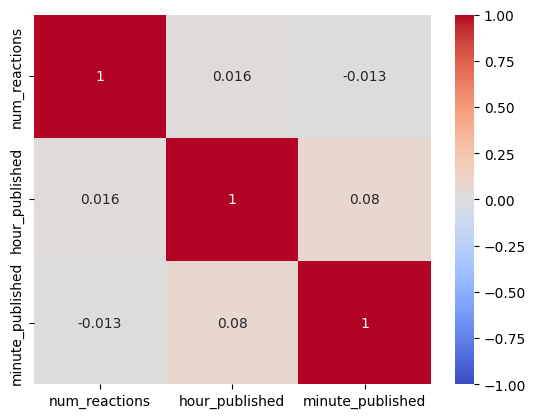

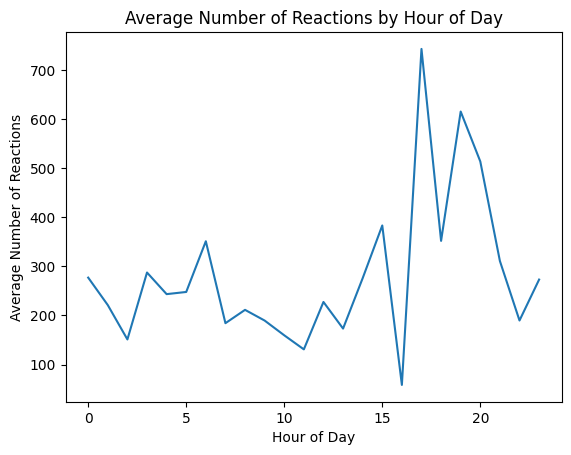

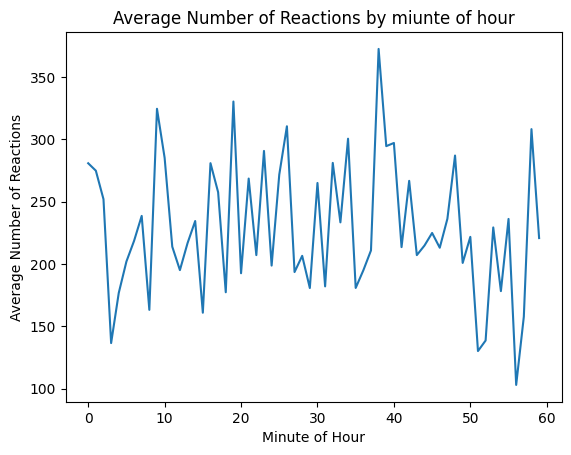

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,hour_published,minute_published
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,6.0,0.0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,22.0,45.0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,6.0,17.0
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,2.0,29.0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,3.0,22.0


In [41]:
Fb_df['status_published'] = (
    pd.to_datetime(Fb_df['status_published'], errors='coerce')
      .dt.strftime('%d.%m.%Y %H:%M:%S')
)

print(Fb_df['status_published'].head())

Fb_df['status_published'] = pd.to_datetime(Fb_df['status_published'], format='%d.%m.%Y %H:%M:%S')

# Extract relevant time components
Fb_df['hour_published'] = Fb_df['status_published'].dt.hour
Fb_df['minute_published'] = Fb_df['status_published'].dt.minute

#correlation heatmap fornum_reaction with datetime
corr = Fb_df[['num_reactions','hour_published', 'minute_published']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1,vmax=1)

# Plotting the relationship
plt.figure()

# Example: Hourly trend
sns.lineplot(x='hour_published', y='num_reactions', data=Fb_df, estimator='mean', ci=None)
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.title('Average Number of Reactions by Hour of Day')
plt.show()
sns.lineplot(x='minute_published', y='num_reactions', data=Fb_df, estimator='mean', ci=None)
plt.title('Average Number of Reactions by miunte of hour')
plt.xlabel('Minute of Hour')
plt.ylabel('Average Number of Reactions')

plt.show()

Fb_df.head()

In [42]:
Fb_df=Fb_df.drop(columns=['status_published','status_id','hour_published','minute_published'])
Fb_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,video,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,photo,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,video,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,photo,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,photo,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Data preprocessing

In [44]:
# Handling missing values
# Check for NaNs in each column
print("NaNs per column before handling:")
print(Fb_df.isna().sum())

# Check the proportion of NaNs in each column
print("\nProportion of NaNs per column:")
print(Fb_df.isna().mean())

# Handle missing values
# Drop columns with more than 50% missing values
Fb_df = Fb_df.dropna(axis=1, thresh=len(Fb_df) * 0.5)

print("\nNaNs per column after handling:")
print(Fb_df.isna().sum())


NaNs per column before handling:
status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

Proportion of NaNs per column:
status_type      0.0
num_reactions    0.0
num_comments     0.0
num_shares       0.0
num_likes        0.0
num_loves        0.0
num_wows         0.0
num_hahas        0.0
num_sads         0.0
num_angrys       0.0
dtype: float64

NaNs per column after handling:
status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64


Correlation between features

<Axes: >

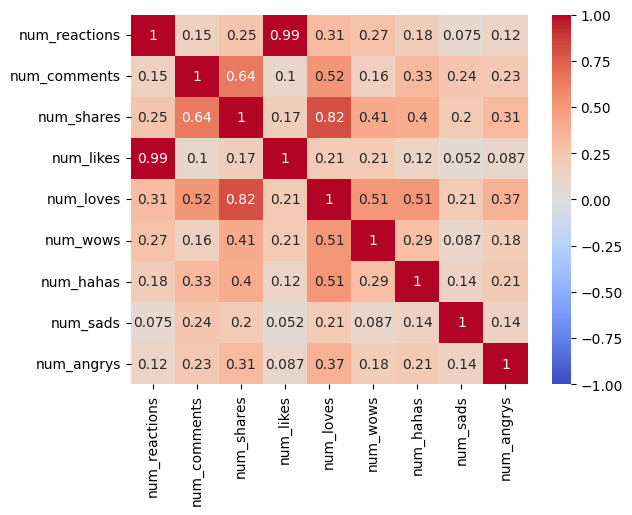

In [45]:
#correlation heatmap
corr = Fb_df[['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads','num_angrys']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1,vmax=1)

Features

In [46]:
#handling categorical data like status_type
print(Fb_df['status_type'].unique())
df_encoded = pd.get_dummies(Fb_df, columns=['status_type'])
df_encoded.head()

#features
X = df_encoded
X.head()


['video' 'photo' 'link' 'status']


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,False,False,False,True
1,150,0,0,150,0,0,0,0,0,False,True,False,False
2,227,236,57,204,21,1,1,0,0,False,False,False,True
3,111,0,0,111,0,0,0,0,0,False,True,False,False
4,213,0,0,204,9,0,0,0,0,False,True,False,False


K-Means Clustering

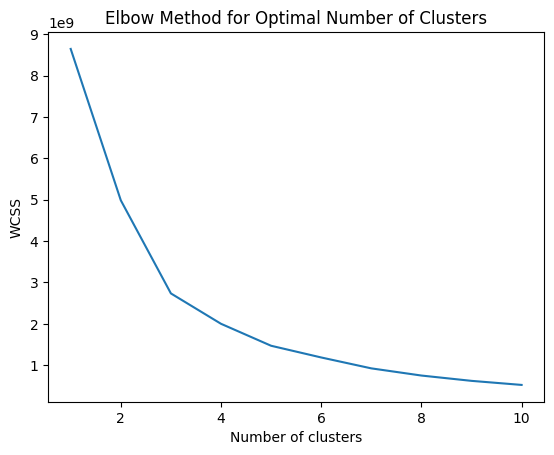

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



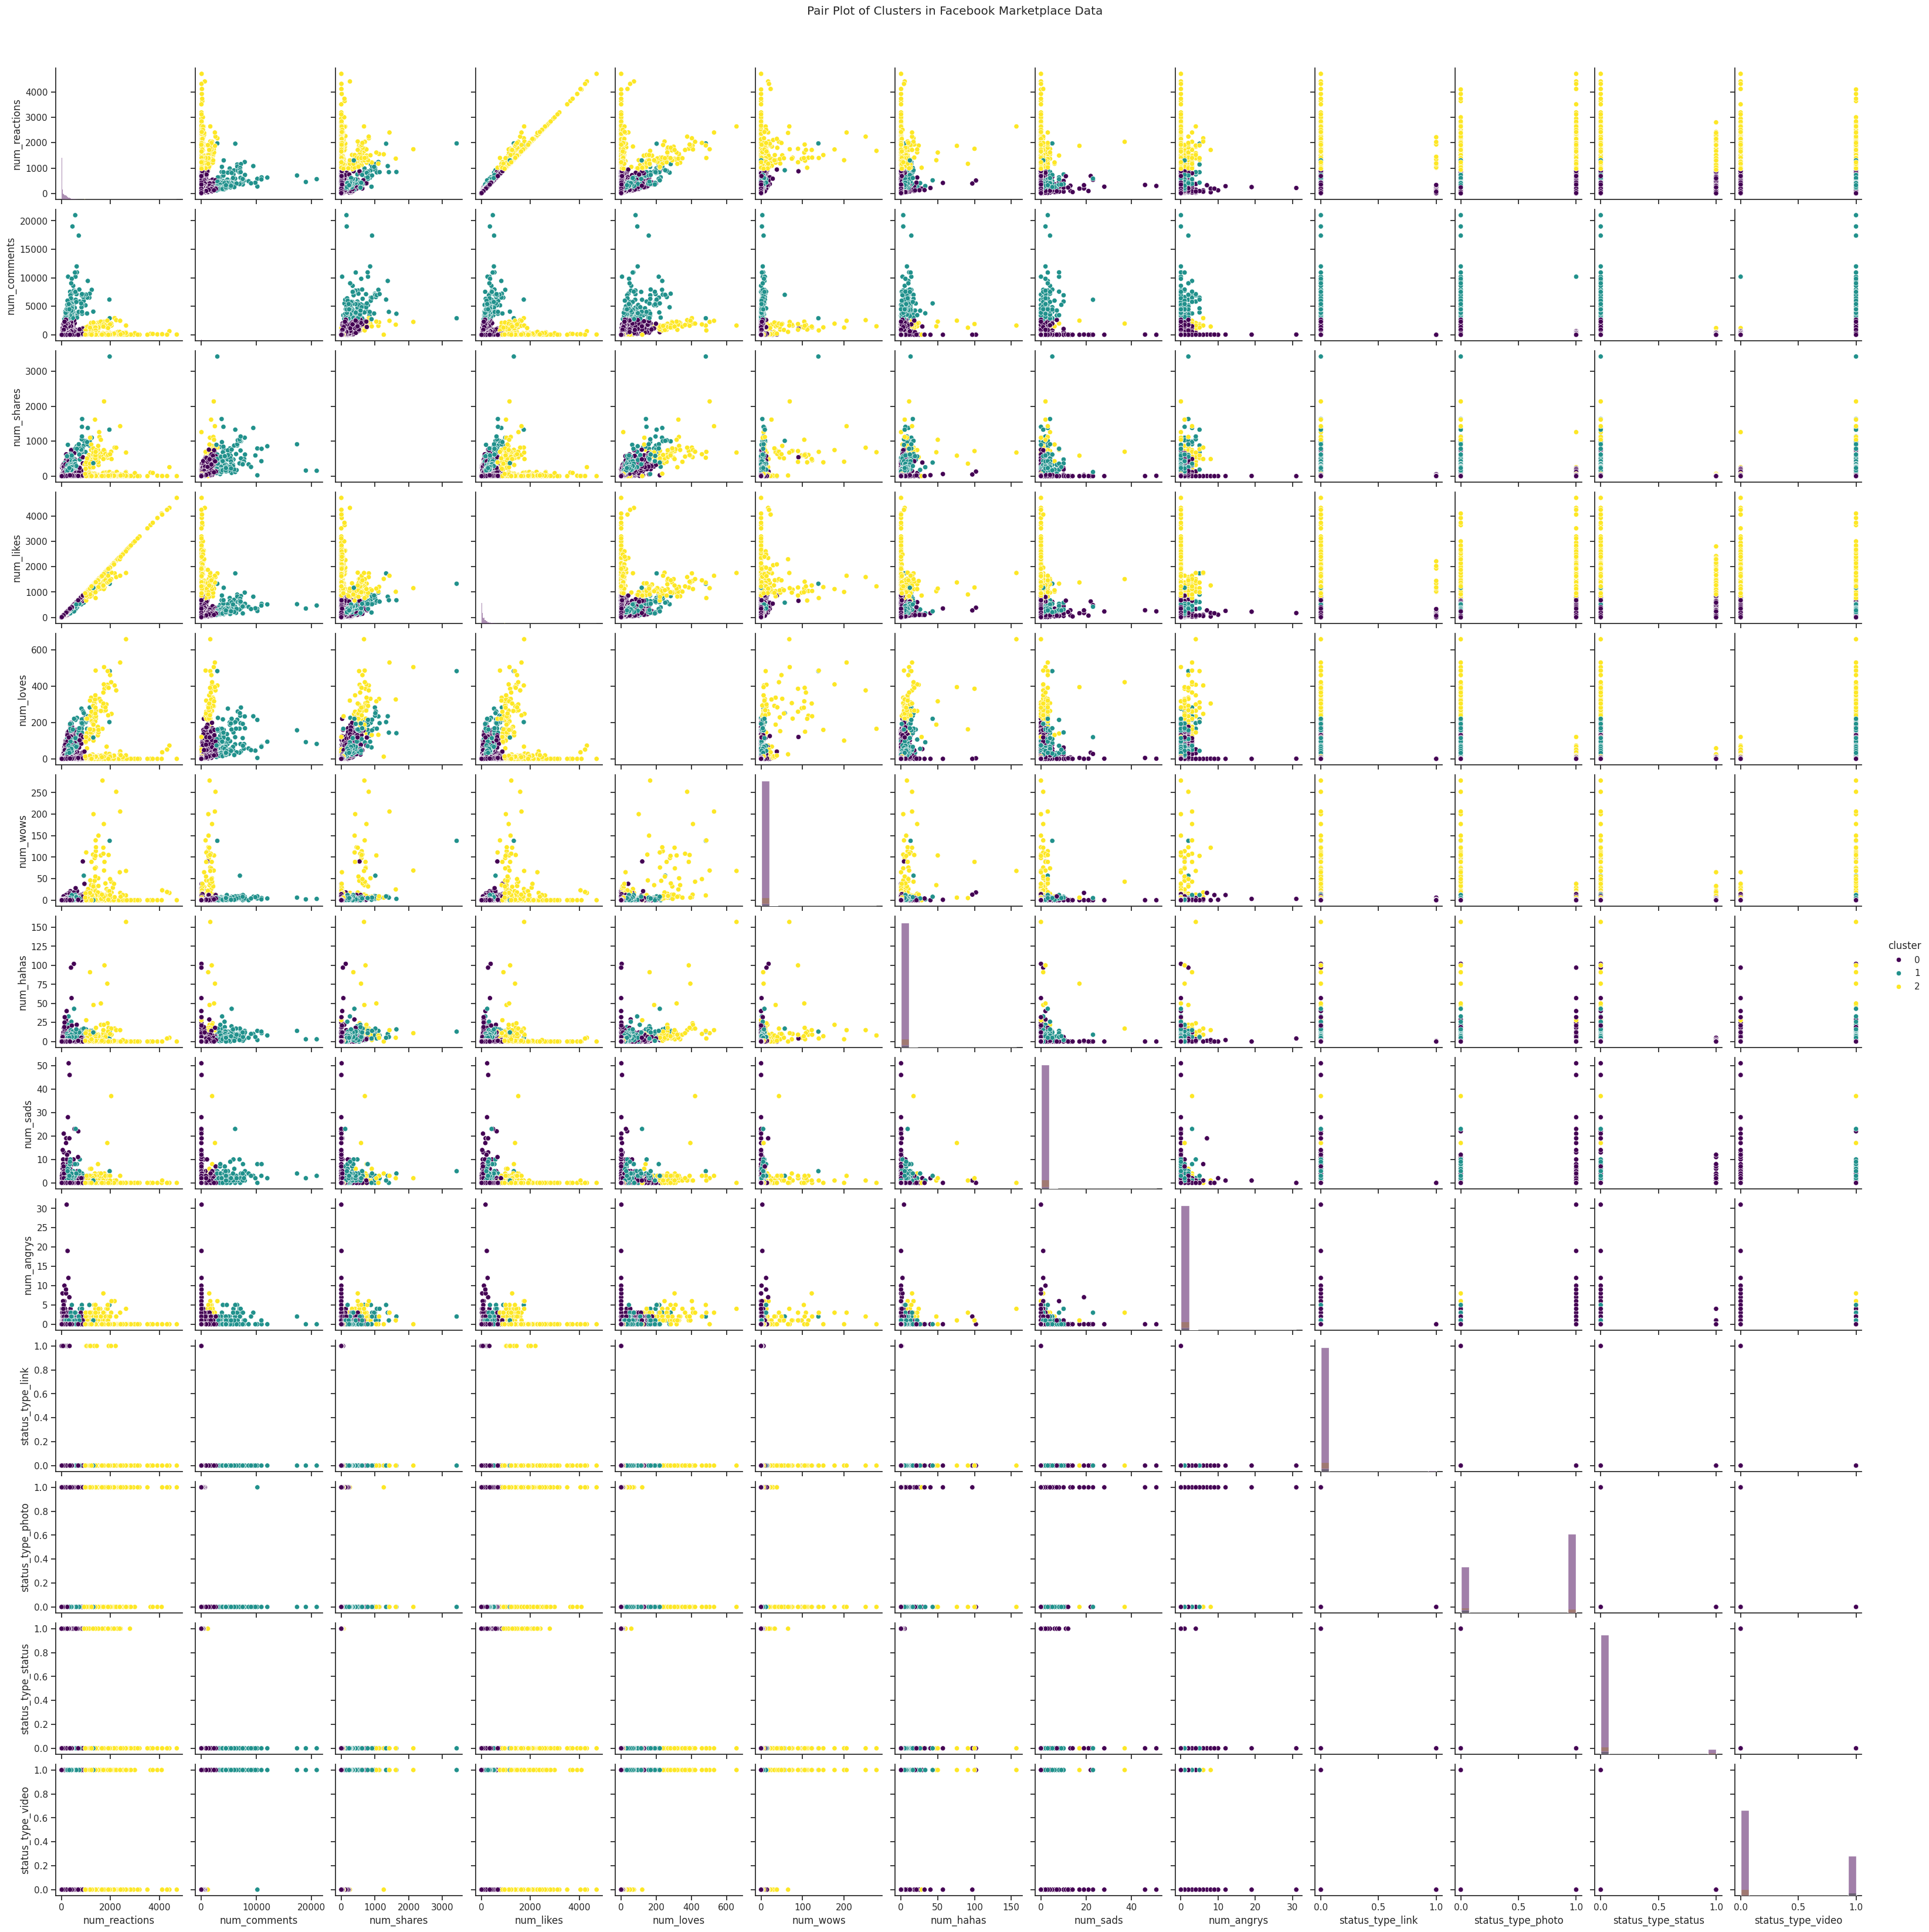

In [48]:
# Applying K-means clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters,init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Adding the cluster labels to the DataFrame
df_encoded['cluster'] = clusters

sns.set(style="ticks")
sns.pairplot(df_encoded, hue='cluster', palette='viridis', diag_kind='hist', height=2.5)
plt.suptitle('Pair Plot of Clusters in Facebook Marketplace Data', y=1.02)
plt.show()


In [49]:
#counts of different types of status
status_counts = Fb_df['status_type'].value_counts()
print(status_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [50]:
#average value of attributes for each status type
average_values = Fb_df.groupby('status_type').mean()
print(average_values)


             num_reactions  num_comments  num_shares   num_likes  num_loves  \
status_type                                                                   
link            370.142857      5.698413    4.396825  369.619048   0.301587   
photo           181.290345     15.993470    2.553871  178.778451   1.445196   
status          438.783562     36.238356    2.558904  435.528767   1.561644   
video           283.409597    642.478149  115.679949  243.015424  35.540274   

             num_wows  num_hahas  num_sads  num_angrys  
status_type                                             
link         0.190476   0.031746  0.000000    0.000000  
photo        0.684701   0.190765  0.142491    0.045709  
status       1.172603   0.109589  0.386301    0.024658  
video        2.448158   1.735219  0.413882    0.254070  
